# 전통적 선형 회귀 분석 

In [1]:
#데이터 구조
import pandas as pd

#행렬 구조
import numpy as np

#데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#데이터 분할(train, test)
from sklearn.model_selection import train_test_split

#회귀분석
from statsmodels.formula.api import ols

#qqplot
from statsmodels.api import qqplot, add_constant

#선형모델 formula (y ~ x1+x2+...)
import statsmodels.formula.api as smf

#평가함수
from statsmodels.tools.eval_measures import rmse

#결정계수 평가지표
from sklearn.metrics import r2_score

#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
mpl.rc("font", family = "Malgun Gothic")
mpl.rc('axes', unicode_minus = False)

In [3]:
#파일 읽어오기
df_raw = pd.read_csv('../data/body.csv')

In [4]:
#DF 정보 살펴보기
df_raw.head()
# FAT(비만), AGE(나이), WEIGHT(몸무게), HEIGHT(키), NECK(목), CHEST(가슴), ABDOMEN(복부), HIP(엉덩이)
#  KNEE(무릎), BICEPS(이두박근), FOREARM(팔뚝), WRIST(손목)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [6]:
# 컬럼 확인
df_raw.columns

Index(['FAT', 'AGE', 'WEIGHT', 'HEIGHT', 'NECK', 'CHEST', 'ABDOMEN', 'HIP',
       'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM', 'WRIST'],
      dtype='object')

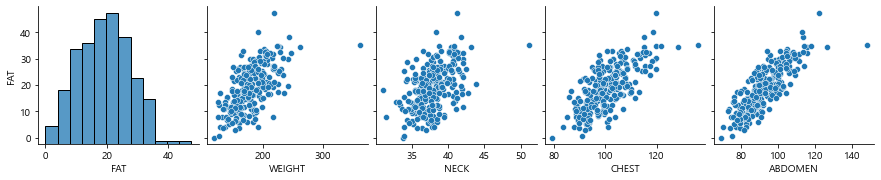

In [7]:
# 산점도 행렬
sns.pairplot(df_raw, y_vars="FAT", x_vars=["FAT","WEIGHT", "NECK", "CHEST", "ABDOMEN"])


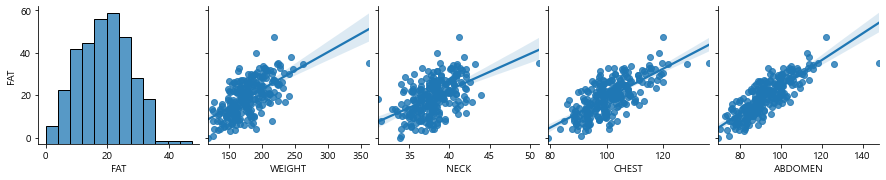

In [8]:

# 회귀 적합선 추가 : kind ="reg" 
sns.pairplot(df_raw, y_vars="FAT", x_vars=["FAT","WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind="reg")

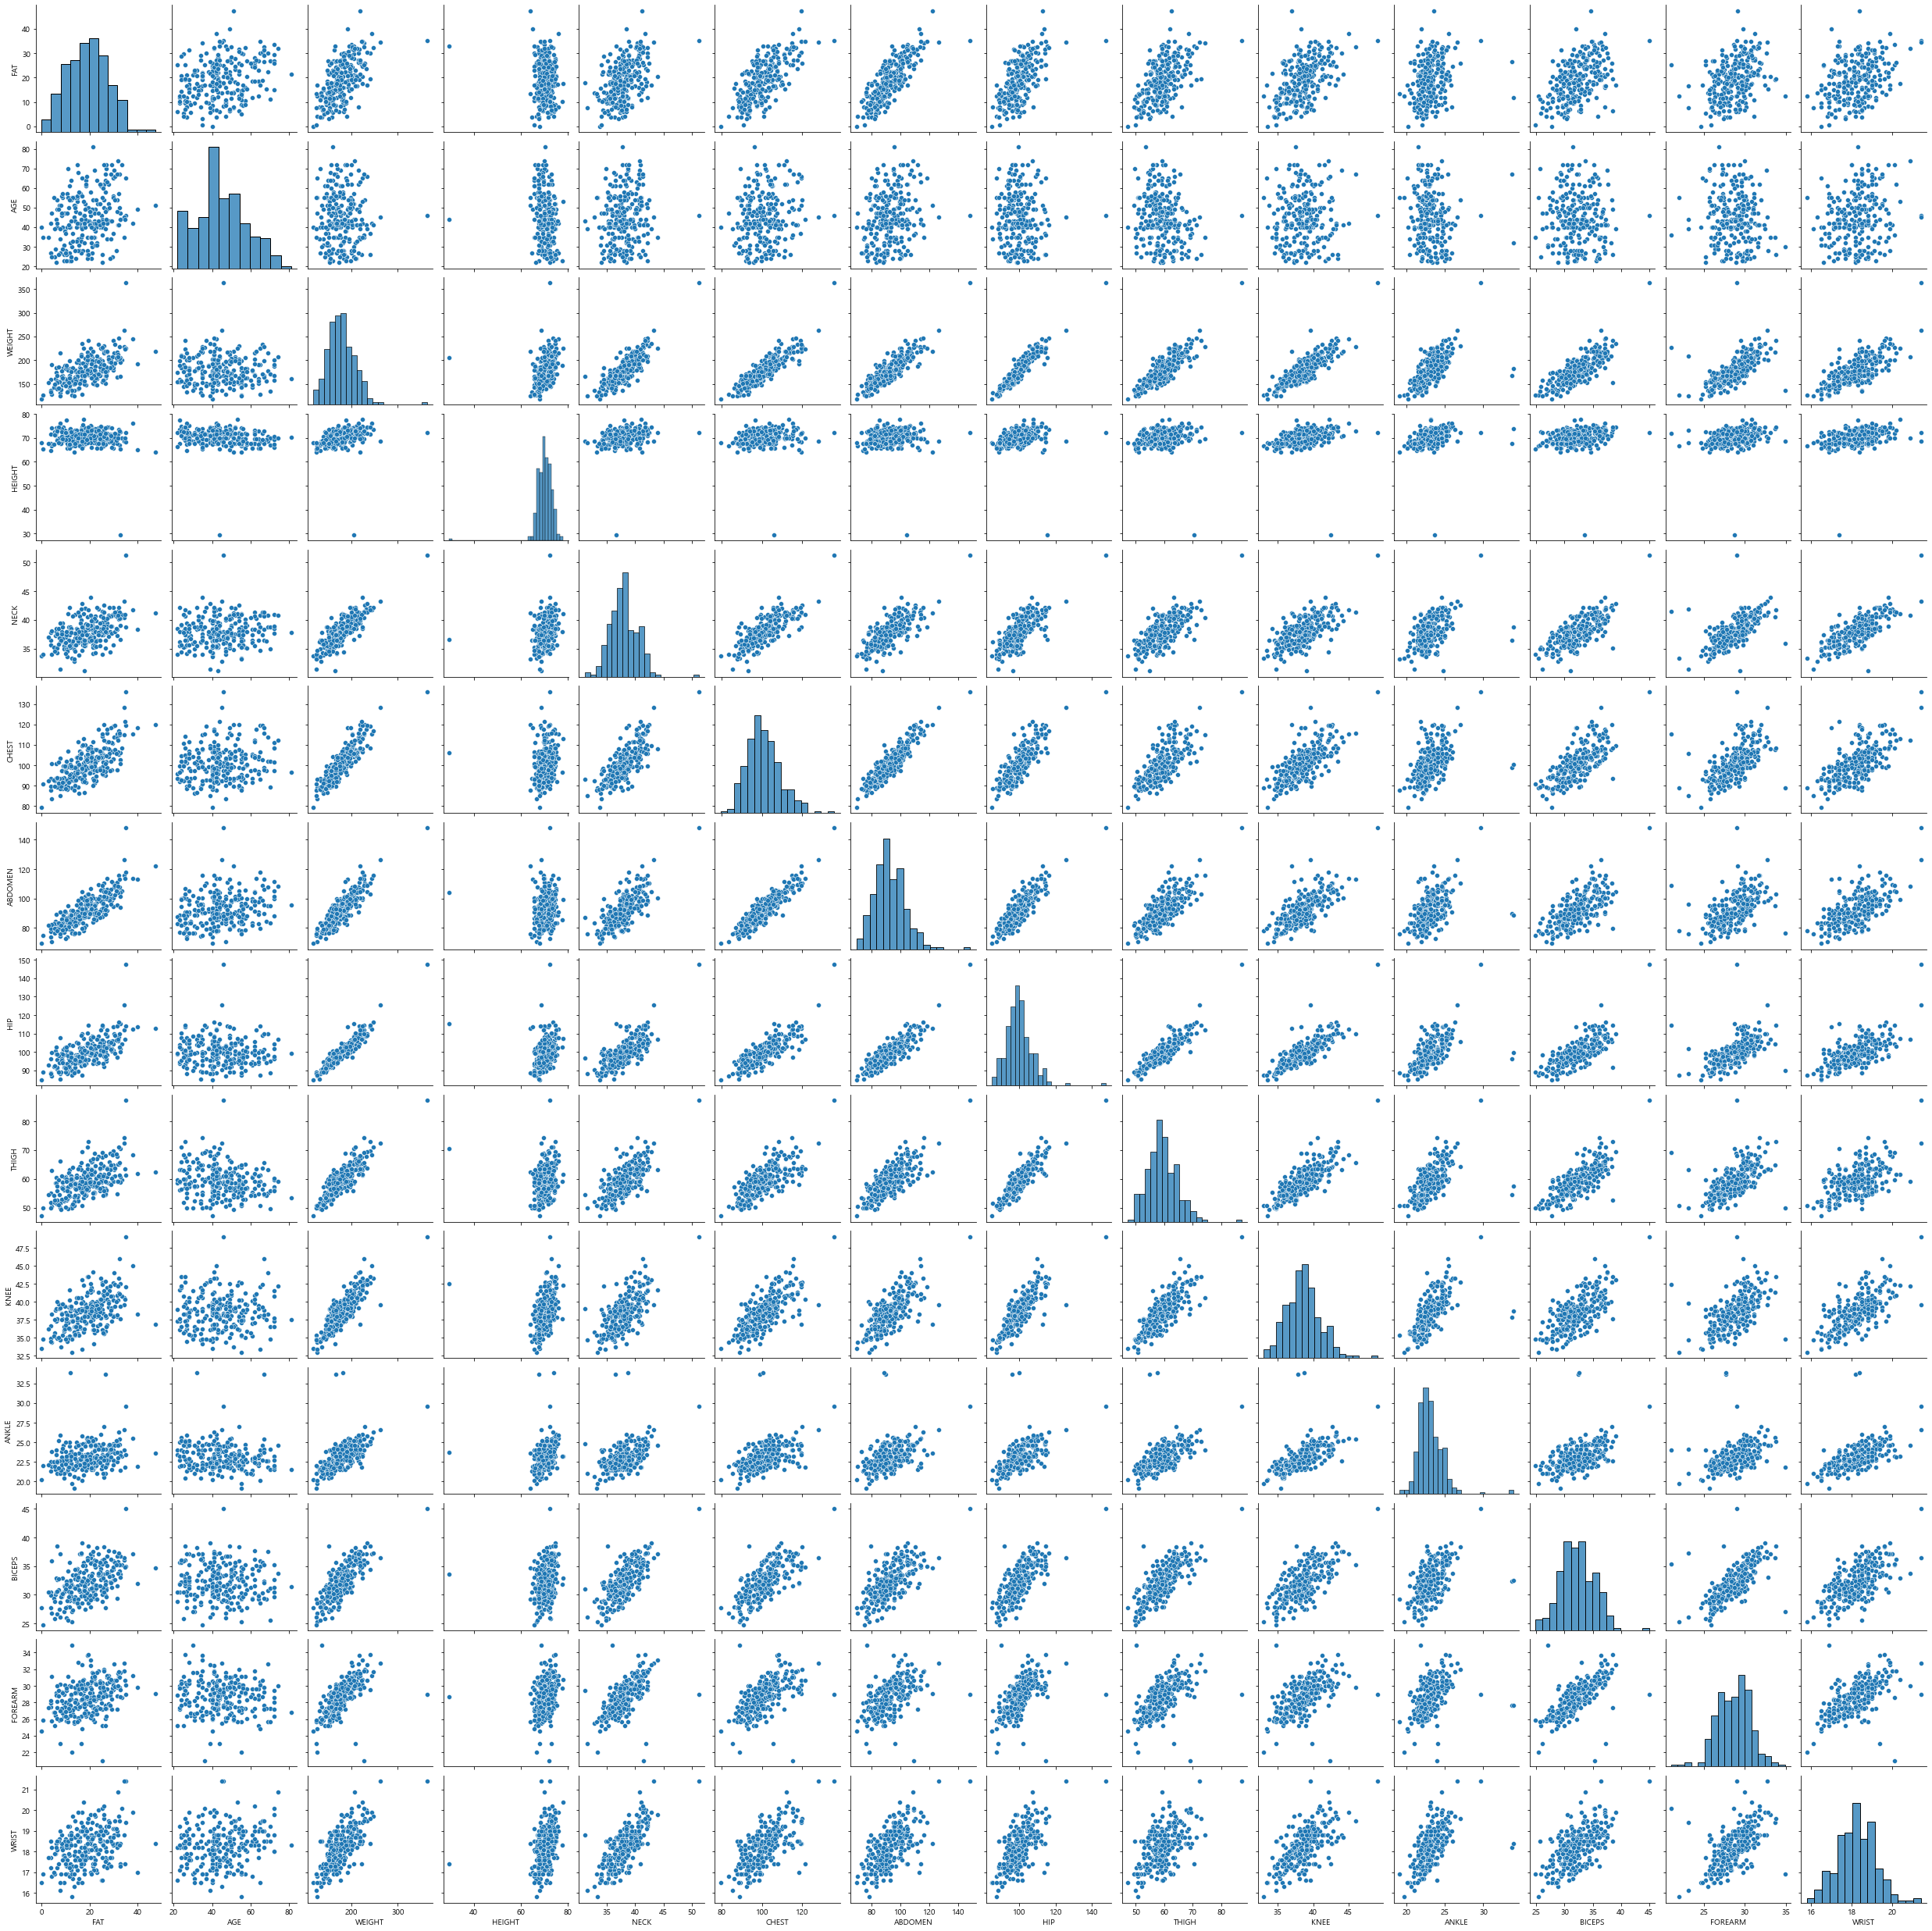

In [9]:
# 산점도 행렬
sns.pairplot(df_raw)
#  몸무게(WEIGHT)와 선형성을 보이는 변수들이 많음
#  목 둘레(NECK)와 선형성을 보이는 변수들이 많음

In [10]:
# 상관관계 분석
df_raw.corr().round(3)

# 체질 비만도(FAT)와 가슴 둘레(CHEST), 복부 둘레(ABDOMEN) 간의 높은 선형관계 확인
#설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 => 다중공선성 확인 및 처리 필요

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [11]:
# 학습용/평가용 데이터 분리
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print("학습용 데이터 크기 : {}".format(df_train.shape))
print("평가용 데이터 크기 : {}".format(df_test.shape))

# 선형 회귀 분석
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + \
                                THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

#R-squared: 0.769 => 결정계수(0~1) : 모델의 설명력을 대변 => 1에 가까울수록 설명력 높음
# P>|t| < 0.05 => 0.05보다 작은 것들을 다시 회귀분석 돌려야 함 => WEIGHT + ABDOMEN + FOREARM + WRIST 


학습용 데이터 크기 : (176, 14)
평가용 데이터 크기 : (76, 14)
                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     41.45
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           9.76e-45
Time:                        16:35:19   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1018.
Df Residuals:                     162   BIC:                             1063.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

In [12]:
# random_state : 다른 알고리즘에도 공통으로 들어가는 파라미터로 알고리즘은 실행마다 값이 변하기 때문에 값 변화를 보기 힘듦
#              : But - random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있음

In [13]:
# 선형 회귀 분석(유의하지 않은 변수 제거)
reg_model = smf.ols(formula = "FAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST ", data = df_train)


# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

#설명력은 74.8%로 적정
#ANOVA 분석 결과 모델의 P.value가 0.05 이하 이므로, 모델 유의성 적합
#잔차의 정규성 확인
#H0:잔차는 정규분포를 따른다     H1: 잔차는 정규분포를 따르지 않는다 

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     130.5
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           7.27e-51
Time:                        16:35:19   Log-Likelihood:                -500.95
No. Observations:                 176   AIC:                             1012.
Df Residuals:                     171   BIC:                             1028.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.5507      8.472     -5.495      0.0

In [14]:
# 설명변수 간의 다중공선성 확인 
df_raw_x = df_train[['WEIGHT','ABDOMEN', 'FOREARM', 'WRIST']]

# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x) 

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

# VIF를 10 기준으로 => 10 이상이면 다중공선성 문제 있음 => 해당변수 제거

,variable,VIF
3,FOREARM,1.723
4,WRIST,2.231
2,ABDOMEN,4.642
1,WEIGHT,6.911
0,const,706.602


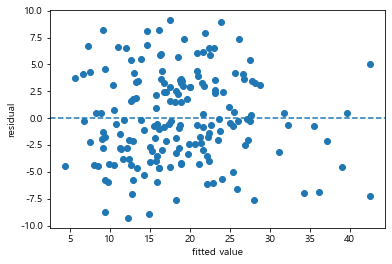

In [15]:
# 잔차의 등분산성 : X-예측값(reg_result.fittedvalues), Y-잔차(reg_result.resid)
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

# ▶ 잔차가 y = 0을 기준으로 Random하게 산포되어 있으므로 등분산성 만족

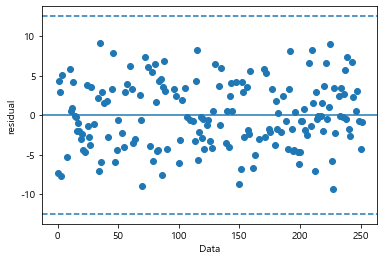

In [16]:
# 잔차의 독립성 : X-데이터순서, Y-잔차 
plt.scatter(df_train.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

# ▶ 잔차가 관리도의 관리기준을 초과하는 데이터가 없고 경향성이 없으므로 독립성 만족

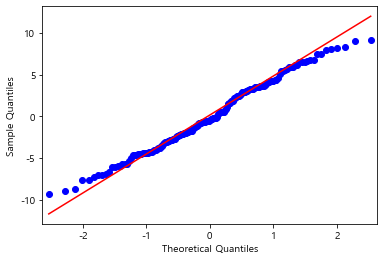

In [17]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line 
#qqplot => 잔차의 정규성을 볼 수 있음

qqplot(reg_result.resid, line="q")
plt.show()

# 잔차항이 정규분포를 따르는지를 검정
# 정규활률도의 각 점들이 직선을 따라 분포하므로 정규분포를 따르는 것으로 판단
# 실제 검정 결과에도 정규성을 따르는 것으로 도출되는 것과 일치

In [18]:
reg_result.params.values[1:]

array([-0.16172582,  1.00891089,  0.64896033, -0.95754329])

In [19]:
df_raw_x.columns

Index(['WEIGHT', 'ABDOMEN', 'FOREARM', 'WRIST'], dtype='object')

<AxesSubplot:>

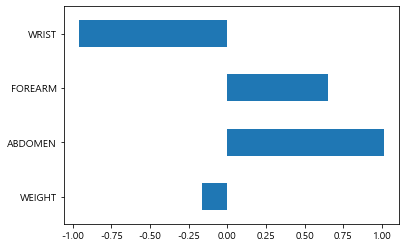

In [20]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]},index=df_raw_x.columns)
df_reg_coef.plot.barh(y = "Coef", legend = False)

# 중요도는 회귀계수의 절대값 크기
# 손목 두께(WRIST)가 얇을수록 체질 비만도(FAT)가 높음
# 복부 둘레(ABDOMEN)가 커질수록 체질 비만도(FAT)가 높음

In [21]:
y_pred = reg_result.predict(df_test)
print("평가용 데이터의 설명력 : ",r2_score(df_test['FAT'],y_pred))

평가용 데이터의 설명력 :  0.6710568091890072


# 의사결정 나무 Model

In [22]:
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 나무구조 시각화
from sklearn.tree import plot_tree

In [23]:
# 한글 맑은 고딕 적용
mpl.rc("font", family = "Malgun Gothic")
# 음수값 표시
mpl.rc('axes', unicode_minus = False)

In [24]:
# 파일명, 변수, 값 등에 한글 포함시 encoding=“euc-kr" 지정 
df_raw = pd.read_csv("../data/body.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [25]:
# 목표변수, 설명변수 분리
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT",axis=1,inplace=False) 
# df_raw_x => FAT 없음

# 학습용/평가용 데이터 분리
df_train_x,  df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=1234)

print("학습용 데이터의 X 크기 : {}".format(df_train_x.shape))
print("학습용 데이터의 Y 크기 : {}".format(df_train_y.shape))
print("평가용 데이터의 X 크기 : {}".format(df_test_x.shape))
print("평가용 데이터의 Y 크기 : {}".format(df_test_y.shape))


학습용 데이터의 X 크기 : (176, 13)
학습용 데이터의 Y 크기 : (176,)
평가용 데이터의 X 크기 : (76, 13)
평가용 데이터의 Y 크기 : (76,)


In [26]:
# DecisionTreeRegressor => train, test 데이터가 신뢰가 가는가를 확인
# train, test 데이터의 gap 큼 => 조정이 필요함

tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# 학습용 데이터 설명력
print("학습용_train 데이터의 설명력 : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("평가용_test 데이터의 설명력 : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

학습용_train 데이터의 설명력 : 1.000
평가용_test 데이터의 설명력 : 0.345


### - **모델 Parameter 조정 (min_samples_leaf)**

In [27]:
# 학습용 및 평가용 설명력 결과 저장
train_score = []; test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


# 모델 설명력 확인
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


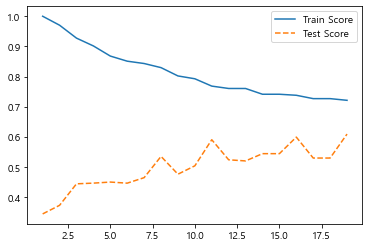

In [28]:
# 모델 설명력 그래프 확인 (시각화)
plt.plot(para_leaf,train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf,test_score, linestyle = "--", label = "Test Score")
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소함
- Train/Test 데이터의 성능 변화를 고려하여 8 선택
- test 데이터의 성능 변화를 고려하면 16 선택 가능하나 train 데이터의 성능이 많이 저하됨

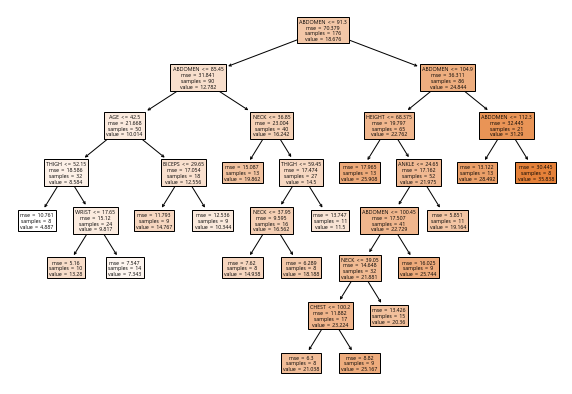

In [29]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료 수=8 모델 
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)
plt.figure(figsize = (10, 7))

# filled = True (트리 색깔 틀리게)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

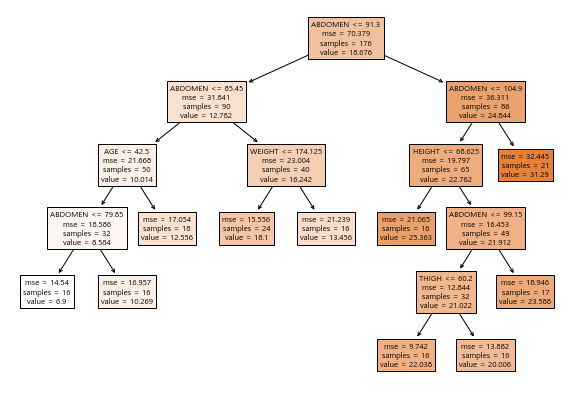

In [30]:
# 노드의 최소 자료 수=16 모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x,df_train_y)

plt.figure(figsize= (10, 7))
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);


- **모델 Parameter 조정 (min_samples_split)**

In [31]:
# 학습용 및 평가용 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split: 분리 노드의 최소 자료 수 => 이 코드 기억하자
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
# 모델의 설명력
df_score_split.round(3)

# 검증 데이터 셋의 스코어가 가장 높은 20 split을 선택 

,MinSamplesSplit,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


- **모델 Parameter 조정 (max_depth)**

In [32]:
# 학습용 및 평가용 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20,
                                            max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
#  모델 설명력 확인
df_score_depth.round(3)


# 검증 데이터 셋의 스코어가 가장 높은 6 depth 을 선택 

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


In [33]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 6, 
                                               random_state=1234)
tree_final.fit(df_train_x, df_train_y)


DecisionTreeRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

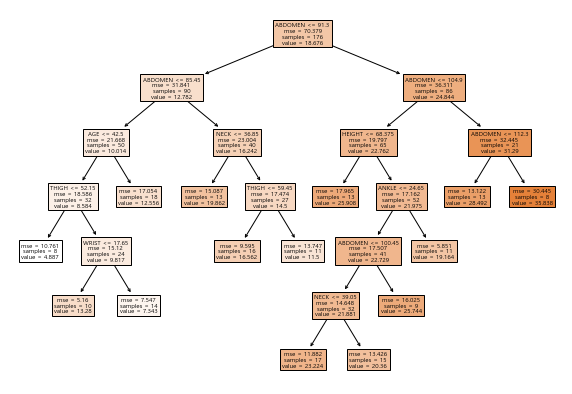

In [34]:
plt.figure(figsize = (10, 7))
plot_tree(tree_final)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

- 트리 분리에 영향이 큰 변수는 ABDOMEN, AGE, NECK 등 
- 복부 둘레(ABDOMEN) ≤ 91.3 이면 True(자료 수=90, 체질 비만도 평균이 감소(18.676->12.782)하고 MSE는 감소)
- 복부 둘레(ABDOMEN) > 91.3 이면 False(자료 수=86, 체질 비만도 평균이 증가(18.676->24.844)하고 MSE는 감소)로 분리 
    - (이후 분리 조건의 좌측이 True, 우측이 False로 적용됨)

- **Feature Importance 확인**

In [35]:
# tree.feature_importances로 설명변수 중요도 확인(=Feature의 중요도) 및 테이블로 저장
# Feature => 설명변수(=독립변수)
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

# ABDOMEN Feature가 중요한 변수다


,Feature,Importance
5,ABDOMEN,0.872
3,NECK,0.032
7,THIGH,0.031
12,WRIST,0.020
0,AGE,0.018
2,HEIGHT,0.016
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000


Text(0, 0.5, '변수')

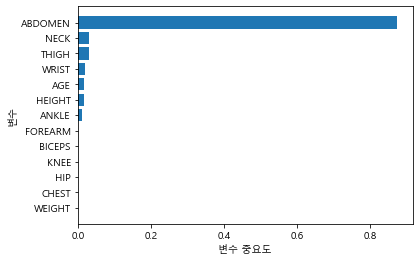

In [36]:
# 설명변수 중요도 그래프
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


- **Grid Search 를 활용한 최적 Parameter 확인**

하이퍼 파라미터 튜닝(그리드 서치)

모델 학습과정에서 꼭 필요한 파라미터 튜닝 작업
튜닝을 통해 모델의 과적합을 방지하고 모델 스코어를 올릴 수 있기 때문에 필수적인 작업
아래는 Decision Tree의 각 파라미터와 설명 -> 이외에도 많은 파라미터가 있지만 주로 튜닝하는 파라미터만 Review 

- criterion : 노드 분리기준 'gini'와 'entropy' 등을 사용

- splitter : 노드 분리 방법으로 'random', 'best'를 사용합니다.

- max_depth : 트리 모형의 최대 깊이를 의미하며 값이 커질수록 깊어져 과적합이 쉽게 일어남

- min_samples_split : 중간노드에서 분리가 일어나기 위한 샘플의 수

- min_samples_leaf : leaf 노드에서 필요한 최소한의 샘플 수이며 너무 적으면 과적합이 일어날 수 있음

- max_features : 노드를 분리할 때 고려하는 속성의 수
               : 'int', 'float', 'auto', 'sqrt', 'log2', None 값이 들어가며 각 다른 방식으로 계산해 속성의 수를 고려

아래 코드는 파라미터 튜닝을 하기위한 GridSearchCV
sklearn 패키지에서 제공하는 것으로 튜닝하고 싶은 파라미터를 집어넣어 튜닝과 교차검증을 함께 진행할 수 있게 도와줌
Gridsearch는 확인하고 싶은 다양한 파라미터값을 넣어주면 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

In [37]:
# mse, friedman_mse, mae 3가지 기준
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=2, max_features='auto',
                      min_samples_leaf=18, min_samples_split=4)

best parameter: 
{'criterion': 'mae', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 18, 'min_samples_split': 4}

best score: 
0.613


# Random Forest Model 

In [42]:
# 데이터 구조
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 나무구조 시각화
from sklearn.tree import plot_tree

In [43]:
# 한글 맑은 고딕 적용
mpl.rc("font", family = "Malgun Gothic")
# 음수값 표시
mpl.rc('axes', unicode_minus = False)

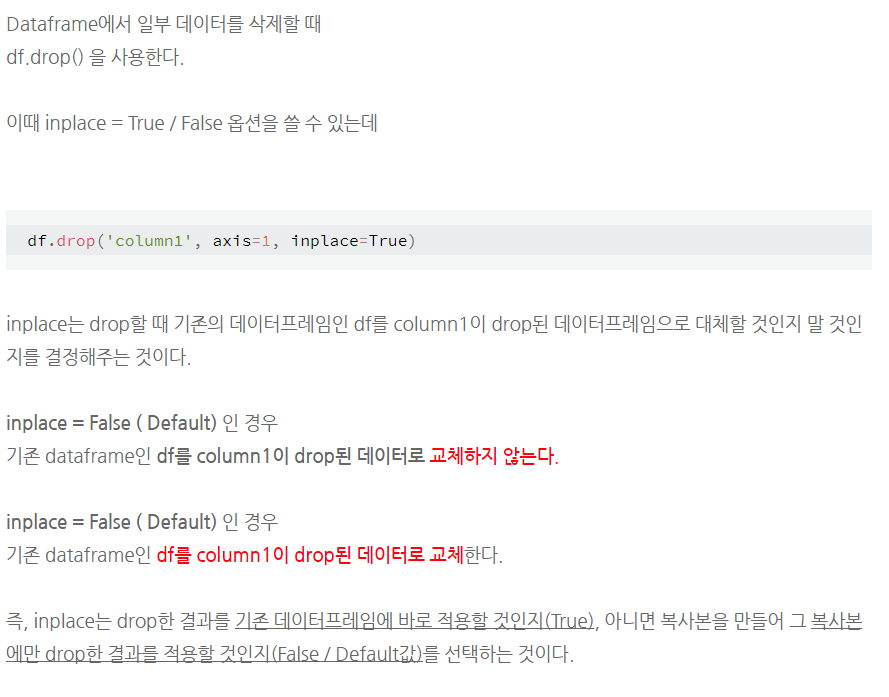

In [44]:
# 파일명, 변수, 값 등에 한글 포함시 encoding=“euc-kr" 지정 
df_raw = pd.read_csv("../data/body.csv")
df_raw.head()
# 목표변수, 설명변수 분리
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)
# 학습용/평가용 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                              test_size = 0.3, random_state = 1234) 
print("학습용 데이터의 X 크기 : {}".format(df_train_x.shape))
print("학습용 데이터의 Y 크기 : {}".format(df_train_y.shape))
print("평가용 데이터의 X 크기 : {}".format(df_test_x.shape))
print("평가용 데이터의 Y 크기 : {}".format(df_test_y.shape))

학습용 데이터의 X 크기 : (176, 13)
학습용 데이터의 Y 크기 : (176,)
평가용 데이터의 X 크기 : (76, 13)
평가용 데이터의 Y 크기 : (76,)


In [46]:
rf_uncustomized = RandomForestRegressor(random_state=1234) 
rf_uncustomized.fit(df_train_x, df_train_y)
# 학습용 데이터 설명력
print("학습용 데이터의 설명력 : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# 평가용 데이터 설명력
print("평가용 데이터의 설명력 : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

# 이 모델의 설명력은 괜찮음 = Gap 차이가 별로 안 남

학습용 데이터의 설명력 : 0.956
평가용 데이터의 설명력 : 0.612


In [47]:
estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"n_estimators": [100, 150, 200],"max_depth": [5, 6, 7, 8, 9], "min_samples_split": [1, 2, 3, 4], 
                   "min_samples_leaf": [2, 4, 6, 8]} 
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=8, min_samples_leaf=4, random_state=1234)

best parameter: 
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

best score: 
0.673


In [49]:
rf_final = RandomForestRegressor(n_estimators=100, max_depth=8,min_samples_split = 2, 
                                 min_samples_leaf = 4, random_state=1234)

rf_final.fit(df_train_x, df_train_y)
# 학습용 데이터 설명력
print("학습용 데이터의 설명력: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# 평가용 데이터 설명력
print("평가용 데이터의 설명력: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

학습용 데이터의 설명력: 0.891
평가용 데이터의 설명력: 0.617


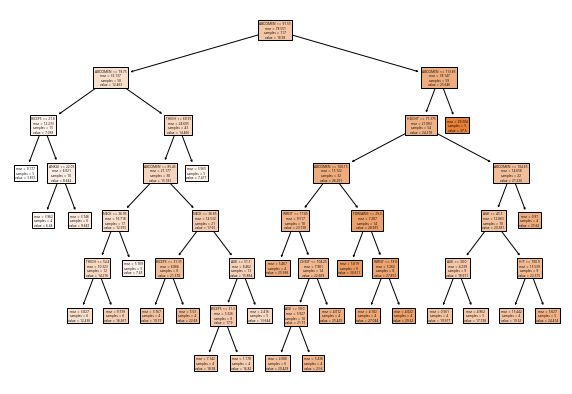

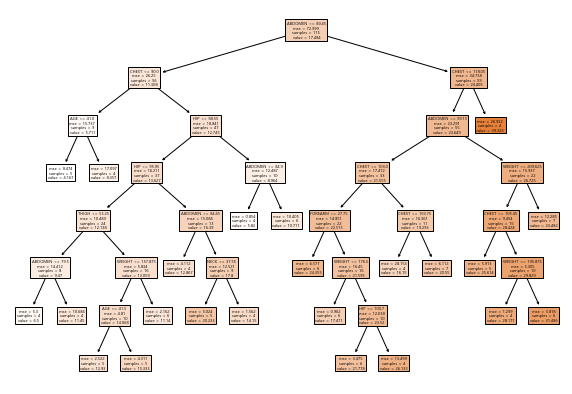

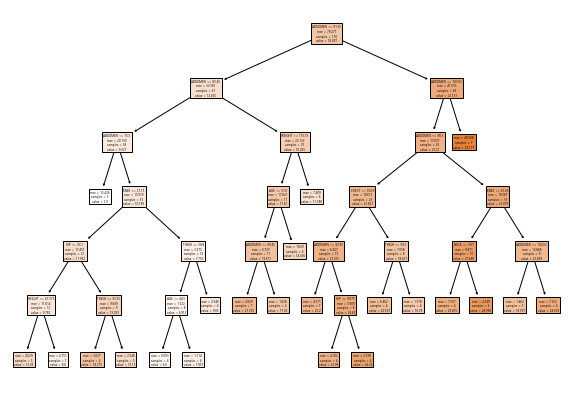

In [54]:
# 결론 도출하기 위해서 plt_tree 시각화

# 변수 저장
v_feature_name = df_train_x.columns

# 0번 트리
plt.figure(figsize = (10, 7))
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);
# 1번 트리
plt.figure(figsize = (10, 7))
plot_tree(rf_final.estimators_[1], feature_names = v_feature_name, filled = True);
# 10번 트리
plt.figure(figsize = (10, 7))
plot_tree(rf_final.estimators_[10], feature_names = v_feature_name, filled = True);

In [55]:
# ABDOMEN Feature가 제일 높음

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.773
4,CHEST,0.047
2,HEIGHT,0.040
6,HIP,0.020
7,THIGH,0.019
0,AGE,0.018
12,WRIST,0.016
3,NECK,0.015
8,KNEE,0.014
9,ANKLE,0.012


# 그래디언트 부스팅 모델 (앙상블 기법)

### - 많이 사용되고 있음
### - 과대적합 문제 있을 수 있음

In [56]:
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
# 파일명, 변수, 값 등에 한글 포함시 encoding=“euc-kr" 지정 
df_raw = pd.read_csv("../data/body.csv")
df_raw.head()
# 목표변수, 설명변수 분리
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)
# 학습용/평가용 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                              test_size = 0.3, random_state = 1234) 
print("학습용 데이터의 X 크기 : {}".format(df_train_x.shape))
print("학습용 데이터의 Y 크기 : {}".format(df_train_y.shape))
print("평가용 데이터의 X 크기 : {}".format(df_test_x.shape))
print("평가용 데이터의 Y 크기 : {}".format(df_test_y.shape))

학습용 데이터의 X 크기 : (176, 13)
학습용 데이터의 Y 크기 : (176,)
평가용 데이터의 X 크기 : (76, 13)
평가용 데이터의 Y 크기 : (76,)


In [62]:
# 모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# 학습용 데이터 설명력
print("학습용 데이터의 설명력 : {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# 평가용 데이터 설명력
print("평가용 데이터의 설명력 : {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

학습용 데이터의 설명력 : 0.981
평가용 데이터의 설명력 : 0.581


In [63]:
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion": ["mse"], "max_features": ["auto"], "learning_rate": [0.1, 0.2], 
              "n_estimators": [100, 150, 200], "max_depth": [4, 5], "min_samples_leaf": [3, 4, 5, 6]}
grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(criterion='mse', max_depth=4, max_features='auto',
                          min_samples_leaf=6, random_state=1234)

best parameter: 
{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 100}

best score: 
0.643


In [64]:
gb_final = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4,  
                                                    min_samples_leaf = 6, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 학습용 데이터 설명력
print("학습용 데이터의 설명력: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# 평가용 데이터 설명력
print("평가용 데이터의 설명력: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))


학습용 데이터의 설명력: 0.987
평가용 데이터의 설명력: 0.556


In [65]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.686
2,HEIGHT,0.056
4,CHEST,0.052
6,HIP,0.033
12,WRIST,0.033
3,NECK,0.024
10,BICEPS,0.022
7,THIGH,0.022
8,KNEE,0.018
9,ANKLE,0.017


## 데이터 불러오기 -> 모델 생성 -> 모델 parameter 조정 -> 결론